# TASK 3: NATURAL LANGUAGE PROCESSING(NLP) - SENTIMENT ANALYSIS

## OBJECTIVE:
- Preprocess text data (tokenization, removing stopwords, and stemming/lemmatization).
- Use nltk or TextBlob for sentiment analysis.
- Visualize the sentiment distribution and word frequencies using word clouds.
- Tools: Python, nltk, TextBlob, pandas, matplotlib.

### 1. IMPORTING LIBRARIES

In [4]:
!pip install textblob
!pip install wordcloud

In [5]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer,WordNetLemmatizer
from textblob import TextBlob
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter

nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwards')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Error loading stopwards: Package 'stopwards' not found in
[nltk_data]     index
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

### 2. READING THE CSV FILE

In [7]:
senti=pd.read_csv(r'Sentiment dataset.csv')
senti=senti[['Text','Sentiment']]
print(senti)

                                                  Text    Sentiment
0     Enjoying a beautiful day at the park!        ...   Positive  
1     Traffic was terrible this morning.           ...   Negative  
2     Just finished an amazing workout! 💪          ...   Positive  
3     Excited about the upcoming weekend getaway!  ...   Positive  
4     Trying out a new recipe for dinner tonight.  ...   Neutral   
..                                                 ...          ...
727  Collaborating on a science project that receiv...       Happy 
728  Attending a surprise birthday party organized ...       Happy 
729  Successfully fundraising for a school charity ...       Happy 
730  Participating in a multicultural festival, cel...       Happy 
731  Organizing a virtual talent show during challe...       Happy 

[732 rows x 2 columns]


### 3. TEXT PREPROCESSING

In [9]:
stop=set(stopwords.words('english'))
stem=PorterStemmer()
lemma=WordNetLemmatizer()

In [10]:
def preprocess(text):
    token=word_tokenize(str(text).lower())
    filtered=[word for word in token if word.isalpha()and word not in stop]
    lem=[lemma.lemmatize(word)for word in filtered]
    return ' '.join(lem)
senti['Processed_text']=senti['Text'].apply(preprocess)
senti[['Text','Processed_text']].head()

,Text,Processed_text
0,Enjoying a beautiful day at the park! ...,enjoying beautiful day park
1,Traffic was terrible this morning. ...,traffic terrible morning
2,Just finished an amazing workout! 💪 ...,finished amazing workout
3,Excited about the upcoming weekend getaway! ...,excited upcoming weekend getaway
4,Trying out a new recipe for dinner tonight. ...,trying new recipe dinner tonight


### 4. SENTIMENT ANALYSIS USING TEXTBLOB

In [12]:
def get_sentiment(text):
    analysis=TextBlob(text)
    pol=analysis.sentiment.polarity
    if pol>0:
        return 'Positive'
    elif pol<0:
        return'Negative'
    else:
        return 'Neutral'
senti['Predicted_sentiment']=senti['Text'].apply(get_sentiment)
senti[['Text','Sentiment','Predicted_sentiment']].head()

,Text,Sentiment,Predicted_sentiment
0,Enjoying a beautiful day at the park! ...,Positive,Positive
1,Traffic was terrible this morning. ...,Negative,Negative
2,Just finished an amazing workout! 💪 ...,Positive,Positive
3,Excited about the upcoming weekend getaway! ...,Positive,Positive
4,Trying out a new recipe for dinner tonight. ...,Neutral,Positive


### 5. VISUALIZING SENTIMENT DISTRIBUTION

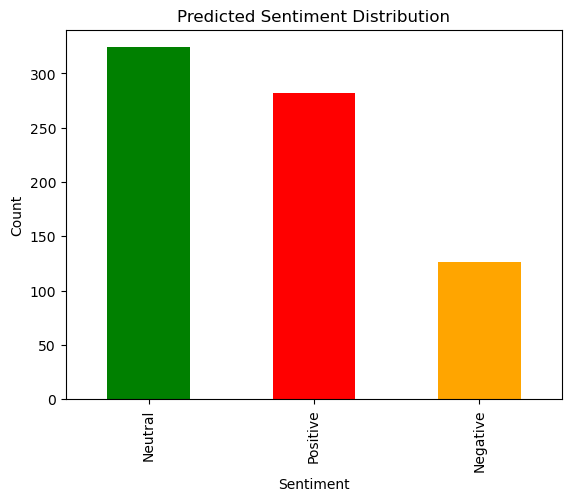

In [14]:
senti['Predicted_sentiment'].value_counts().plot(kind='bar',color=['green','red','orange'])
plt.title('Predicted Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

### 6. WORD CLOUD

In [16]:
all_words= ' '.join(senti['Processed_text'])
wordcloud= WordCloud(width=800, height=400, background_color='white').generate(all_words)

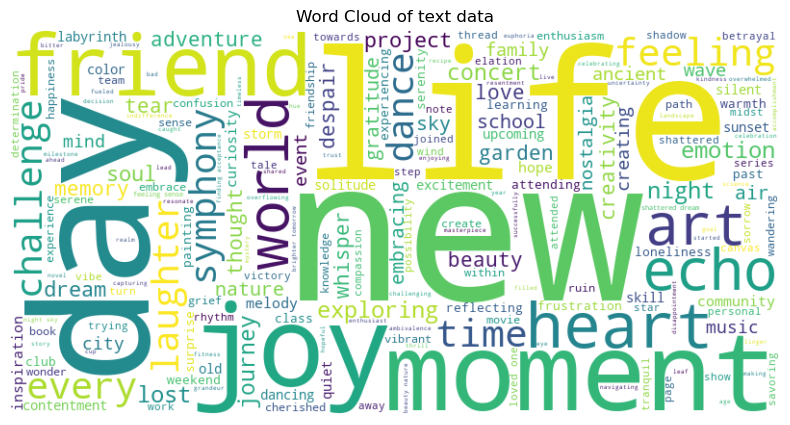

In [17]:
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of text data')
plt.show()

### 7. WORD FREQUENCY

In [19]:
all_tokens=all_words.split()
word_frequency=Counter(all_tokens)

print('Most Common Words:')
print(word_frequency.most_common(10))

Most Common Words:
[('new', 43), ('life', 38), ('day', 29), ('joy', 28), ('dream', 28), ('feeling', 27), ('moment', 27), ('like', 27), ('friend', 26), ('heart', 26)]


### ILLUSTARATION:
- The sentiment breakdown illustrates the number of comments that are positive,negative or neutral.
- The word cloud visually represents the most commonly used and prominent terms within the text data.
- The word frequency chart identifies the highest occuring words in the dataset.
- Combined these analysis offer insights into general sentiment patterns and frequency discussed themes.